In [81]:
import os
import datetime
from collections import defaultdict
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import shutil

mpl.rcParams['figure.figsize'] = (25,16)
mpl.rcParams['axes.grid'] = False

In [68]:
# load data
df = pd.read_csv("./merged_cleaned_FE_imputed(v).csv")
df['Date'] = pd.to_datetime(df['Date'])

df_pivot = df.pivot_table(index=['Date','Month', 'DayoftheMonth', 'WeekoftheMonth', 'DayoftheWeek',
       'WeekoftheYear', 'DayoftheYear', 'isWeekend', 'isWeekStart',
       'isWeekEnd', 'isMonthStart', 'isMonthEnd', 'Season_Autumn',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'isHoliday','StoreID'], columns=['ProductID'], values='Quantity')

df_pivot['total_quantity_day'] = df_pivot.sum(axis=1)

#from the StoreID index select only id 4051653300272
#df_pivot = df_pivot.loc[df_pivot.index.get_level_values('StoreID') == 4051653300272]
#drop the StoreID index
#df_pivot = df_pivot.droplevel('StoreID')
df_pivot = df_pivot.reset_index()

#convert all column names to string
df_pivot.columns = df_pivot.columns.astype(str)
df_pivot

ProductID,Date,Month,DayoftheMonth,WeekoftheMonth,DayoftheWeek,WeekoftheYear,DayoftheYear,isWeekend,isWeekStart,isWeekEnd,...,4260705920539,4260705920546,4260705920553,4260705920560,4260705920577,4260705920584,4260705920591,4260705920607,4260705920638,total_quantity_day
0,2022-05-09,5,9,2,2,19,129,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0
1,2022-05-09,5,9,2,2,19,129,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-05-10,5,10,2,3,19,130,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0
3,2022-05-10,5,10,2,3,19,130,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-05-11,5,11,2,4,19,131,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,2023-02-02,2,2,1,2,5,33,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
540,2023-02-03,2,3,1,3,5,34,False,False,False,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0
541,2023-02-03,2,3,1,3,5,34,False,False,False,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,16.0
542,2023-02-04,2,4,1,4,5,35,True,False,False,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0


In [69]:
df = df_pivot
df['isWeekStart'] = df['isWeekStart'].astype(int)
df['isWeekEnd'] = df['isWeekEnd'].astype(int)
df['isMonthStart'] = df['isMonthStart'].astype(int)
df['isMonthEnd'] = df['isMonthEnd'].astype(int)
df['isWeekend'] = df['isWeekend'].astype(int)
df['isHoliday'] = df['isHoliday'].astype(int)

date_time = pd.to_datetime(df.pop('Date'), format='%Y-%m-%d')
df

ProductID,Month,DayoftheMonth,WeekoftheMonth,DayoftheWeek,WeekoftheYear,DayoftheYear,isWeekend,isWeekStart,isWeekEnd,isMonthStart,...,4260705920539,4260705920546,4260705920553,4260705920560,4260705920577,4260705920584,4260705920591,4260705920607,4260705920638,total_quantity_day
0,5,9,2,2,19,129,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0
1,5,9,2,2,19,129,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,10,2,3,19,130,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0
3,5,10,2,3,19,130,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,11,2,4,19,131,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,2,2,1,2,5,33,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
540,2,3,1,3,5,34,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0
541,2,3,1,3,5,34,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,16.0
542,2,4,1,4,5,35,1,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0


In [70]:
prod_ids = set()
for e in df.columns:
  if e.startswith("42"):
    prod_ids.add(e)

In [79]:
from numpy.core.fromnumeric import prod
#groupby DayoftheYear and plot the mean of Quantity with font size 4
dico_counts = {
    "4051653300272":defaultdict(lambda: defaultdict(int)),
    "4051653300319":defaultdict(lambda: defaultdict(int)),
}

for idx, row in df.iterrows():
  for e in prod_ids:
    #break
    dico_counts[str(int(row["StoreID"]))][e][int(row["DayoftheYear"])] += row[e]
  #print(row[e])
  #break

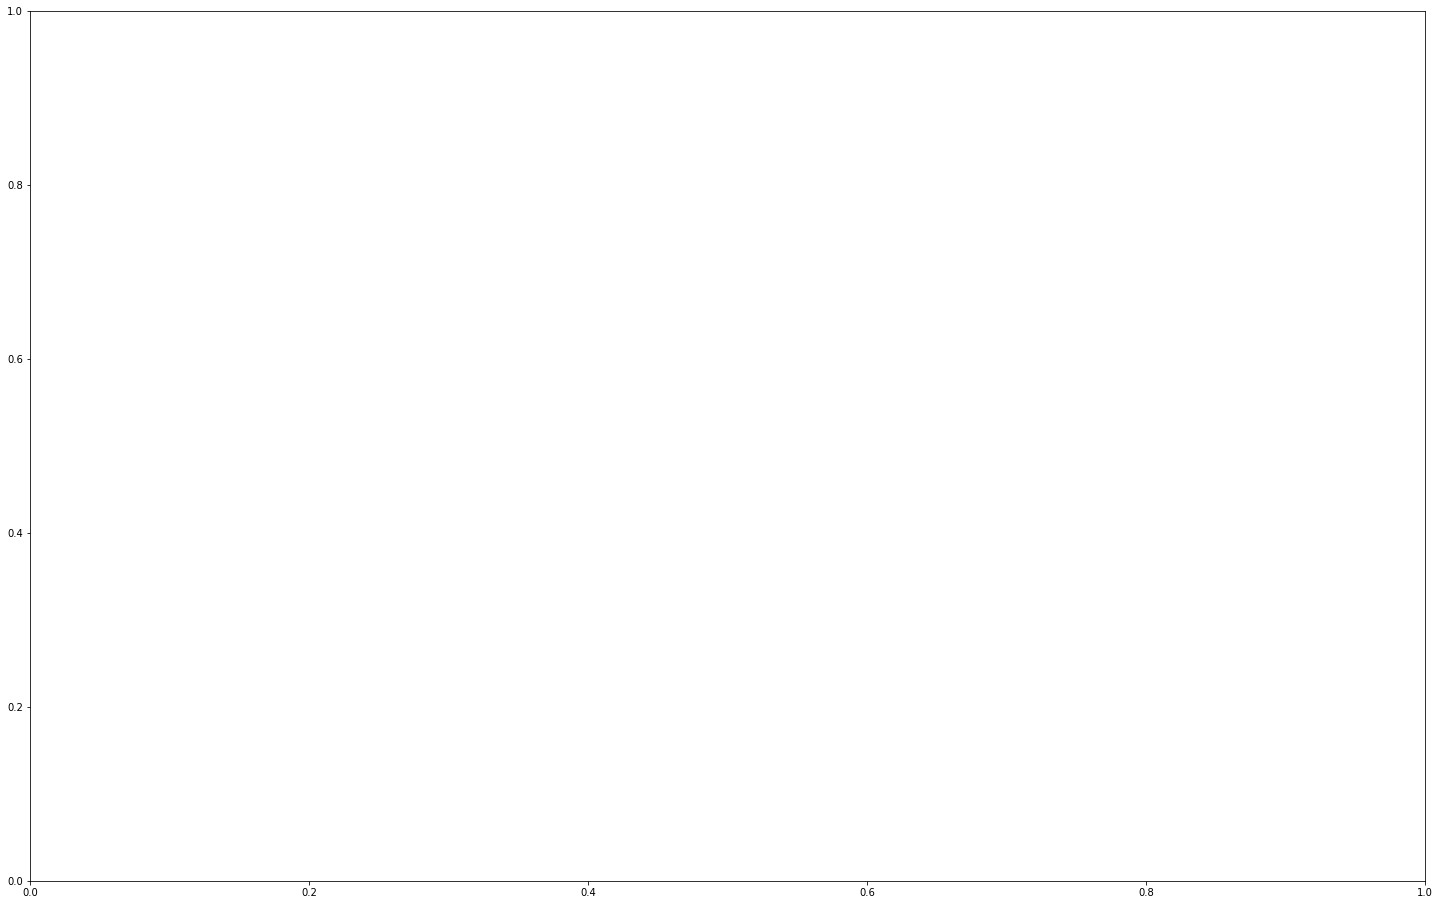

In [80]:
for st, dico in dico_counts.items():
  for k, v in dico.items():
    lst = [0]*365
    for k1, v1 in v.items():
      lst[k1-1] += int(v1)
    plt.plot(lst)
    plt.xlabel("Day of the year")
    plt.ylabel("Qte sold")
    plt.title(k)
    plt.savefig(f"./plots_{st}/{k}.png")
    plt.cla()
  #break

In [83]:
for st, _ in dico_counts.items():
  shutil.make_archive(f"./plots_{st}", 'zip', f"./plots_{st}")

In [88]:
dico_cumulative = {
    "4051653300272":defaultdict(lambda: defaultdict(int)),
    "4051653300319":defaultdict(lambda: defaultdict(int)),
}

In [90]:
for idx, row in df.iterrows():
  for e in prod_ids:
    dico_cumulative[str(int(row["StoreID"]))][e][int(row["WeekoftheYear"])] += row[e]

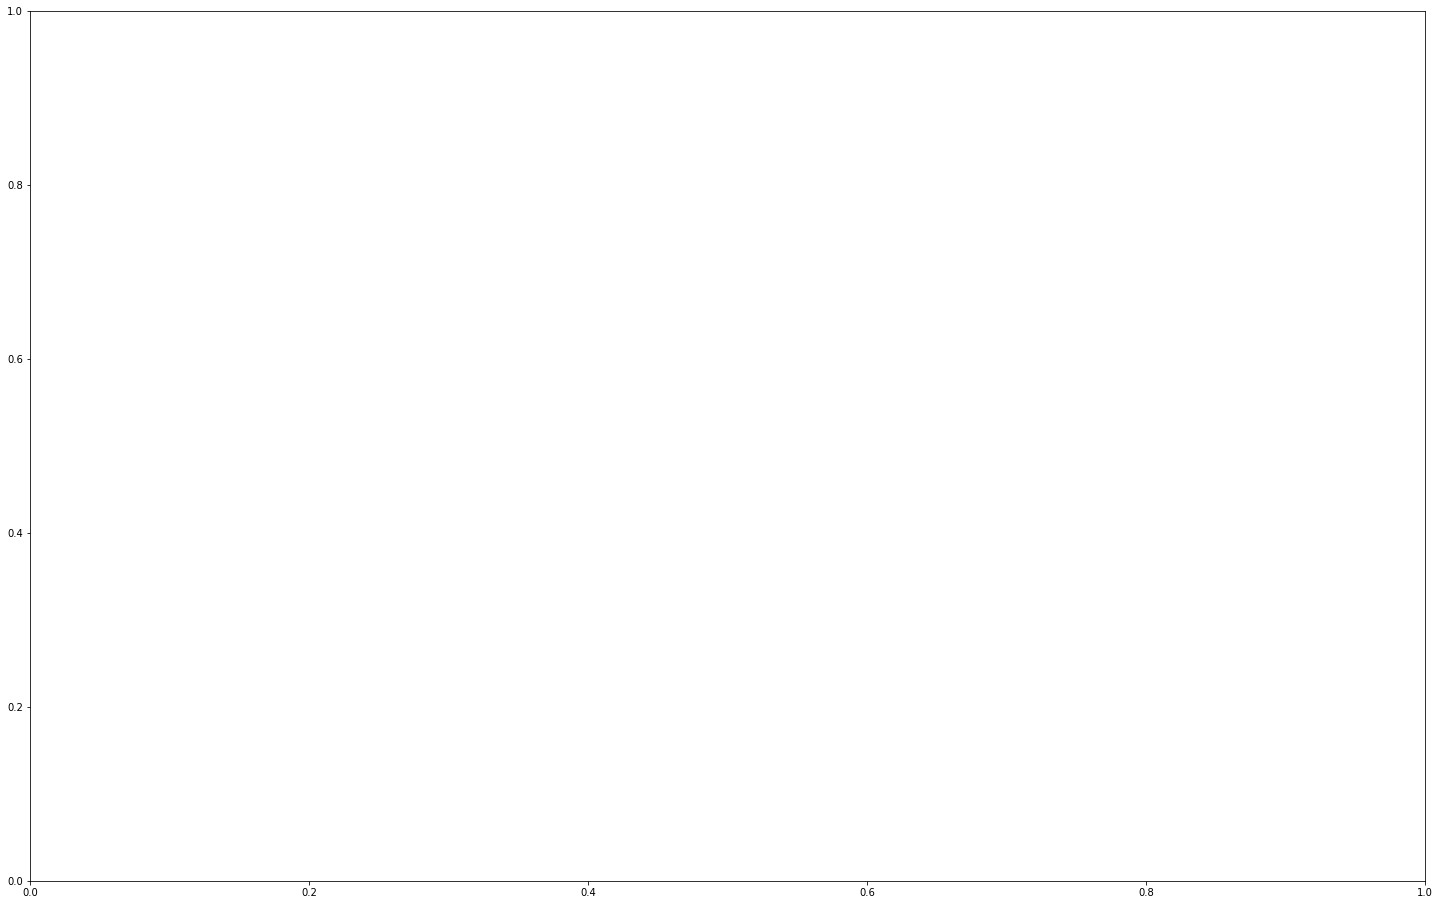

In [103]:
for st, dico in dico_cumulative.items():
  for k, v in dico.items():
    lst = [0]*52
    for k1, v1 in v.items():
      lst[k1-1] += int(v1)
    lst_cumulative = [0]*52
    for i, e in enumerate(lst):
      lst_cumulative[i] = sum(lst[:i])+lst[i]
    plt.plot(lst_cumulative)
    plt.xlabel("Week of the year")
    plt.ylabel("Cumulative qte sold")
    plt.title(k)
    plt.savefig(f"./plots_cumulative_{st}/{k}.png")
    plt.cla()
#    break
#  break

In [104]:
for st, _ in dico_counts.items():
  shutil.make_archive(f"./plots_cumulative_{st}", 'zip', f"./plots_cumulative_{st}")

In [106]:
dico_counts.keys()

dict_keys(['4051653300272', '4051653300319'])

In [126]:
df_store1 = df[df["StoreID"]==4051653300272]
len(df_store1)

272

In [127]:
#Splitting the data
#set 'StoreID','ProductID' as index
# df = df.set_index(['4260705920294'])
column_indices = {name: i for i, name in enumerate(df_store1.columns)}

n = len(df_store1)
train_df = df_store1[0:int(n*0.7)]
val_df = df_store1[int(n*0.7):int(n*0.9)]
test_df = df_store1[int(n*0.9):]

num_features = df_store1.shape[1]

In [128]:
#Normalization
train_mean = train_df.mean()
train_std = train_df.std()
train_std = train_std.replace(0, 0.3)

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [129]:
#Dta Windowing and Splitting
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])


In [130]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [131]:
#Create Tensorflow dataset
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [132]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [133]:
MAX_EPOCHS = 50

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [134]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['4260705920294'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['4260705920294']

In [135]:
#Convolutional
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [136]:
history = compile_and_fit(conv_model, conv_window)

#IPython.display.clear_output()
#val_performance['Conv'] = conv_model.evaluate(conv_window.val)
#performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

Epoch 1/50
6/6 [==============================] - 2s 92ms/step - loss: 1.2974 - mean_absolute_error: 0.9724 - val_loss: 1.1847 - val_mean_absolute_error: 0.8578
Epoch 2/50
6/6 [==============================] - 0s 26ms/step - loss: 0.9795 - mean_absolute_error: 0.8345 - val_loss: 1.0718 - val_mean_absolute_error: 0.8314
Epoch 3/50
6/6 [==============================] - 0s 20ms/step - loss: 0.8218 - mean_absolute_error: 0.7527 - val_loss: 0.9814 - val_mean_absolute_error: 0.8028
Epoch 4/50
6/6 [==============================] - 0s 15ms/step - loss: 0.7095 - mean_absolute_error: 0.6971 - val_loss: 0.8921 - val_mean_absolute_error: 0.7774
Epoch 5/50
6/6 [==============================] - 0s 15ms/step - loss: 0.6153 - mean_absolute_error: 0.6447 - val_loss: 0.8526 - val_mean_absolute_error: 0.7598
Epoch 6/50
6/6 [==============================] - 0s 22ms/step - loss: 0.5431 - mean_absolute_error: 0.5988 - val_loss: 0.8276 - val_mean_absolute_error: 0.7476
Epoch 7/50
6/6 [==================

In [139]:
conv_model.evaluate(conv_window.val)

2/2 [==============================] - 0s 12ms/step - loss: 0.8199 - mean_absolute_error: 0.7444


[0.819894552230835, 0.7443820834159851]

In [ ]:
LABEL_WIDTH = 6
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['4260705920294'])

wide_conv_window

In [141]:
conv_model.plot(conv_model)

AttributeError: ignored